In [1]:
from matplotlib import rc, font_manager as fm

# 나눔고딕 폰트 경로 설정
font_location = 'data/나눔고딕/NanumFontSetup_TTF_GOTHIC/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()

# 폰트 설정
rc('font', family=font_name)

In [2]:
!pip install lightgbm==3.3.2
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [19]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
data_base_gol = pd.read_csv('data/골목상권_데이터230914.csv')

In [21]:
filtered_gol = data_base_gol[data_base_gol['매출'] != 0]
filtered_gol.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2438 entries, 0 to 2471
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   매출                      2438 non-null   float64
 1   기준_년_코드                 2438 non-null   int64  
 2   상권_구분_코드_명              2438 non-null   object 
 3   상권_코드                   2438 non-null   int64  
 4   상권_코드_명                 2438 non-null   object 
 5   점포수                     2438 non-null   int64  
 6   시간대1                    2438 non-null   int64  
 7   시간대2                    2438 non-null   int64  
 8   시간대3                    2438 non-null   int64  
 9   시간대4                    2438 non-null   int64  
 10  시간대5                    2438 non-null   int64  
 11  분기_1                    2438 non-null   int64  
 12  분기_2                    2438 non-null   int64  
 13  분기_3                    2438 non-null   int64  
 14  총 상주인구 수                2438 non-null   int64

In [22]:
filtered_gol.to_csv('파일명.csv', index=False, encoding = 'utf-8 sig')

### 시뮬

In [24]:
data2 = pd.read_csv('파일명.csv')

# 월요일부터 금요일까지의 생활인구 수 컬럼 이름
columns_to_sum1 = ['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', '금요일_생활인구_수']
columns_to_sum2 = ['토요일_생활인구_수', '일요일_생활인구_수']

# data3 데이터프레임에서 해당 컬럼을 더하고 각 5, 2로 나누어서 평일, 주말 생활인구수 컬럼 생성
data2['평일_생활인구_평균'] = data2[columns_to_sum1].sum(axis=1) / 5
data2['주말_생활인구_평균'] = data2[columns_to_sum2].sum(axis=1) / 2

data2 = data2.drop(['월요일_생활인구_수', '화요일_생활인구_수', '수요일_생활인구_수', '목요일_생활인구_수', 
                    '금요일_생활인구_수', '토요일_생활인구_수', '일요일_생활인구_수'], axis=1)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=41, early_stopping_rounds=41 will be ignored. Current value: early_stopping_round=41
[1]	training's rmse: 145813	training's l2: 2.12613e+10	valid_1's rmse: 151950	valid_1's l2: 2.30889e+10
[2]	training's rmse: 140252	training's l2: 1.96705e+10	valid_1's rmse: 146772	valid_1's l2: 2.15421e+10
[3]	training's rmse: 135044	training's l2: 1.82369e+10	valid_1's rmse: 142072	valid_1's l2: 2.01845e+10
[4]	training's rmse: 130155	training's l2: 1.69404e+10	valid_1's rmse: 137582	valid_1's l2: 1.89289e+10
[5]	training's rmse: 125298	training's l2: 1.56995e+10	valid_1's rmse: 132640	valid_1's l2: 1.75934e+10
[6]	training's rmse: 120885	training's l2: 1.46131e+10	valid_1's rmse: 128488	valid_1's l2: 1.65091e+10
[7]	training's rmse: 116639	training's l2: 1.36046e+10	valid_1's rmse: 124070	valid_1's l2: 1.53933e+10
[8]	training's rmse: 112751	training's l2: 1.27128e+10	valid_1's rmse: 1203

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 149191	training's l2: 2.22578e+10	valid_1's rmse: 133125	valid_1's l2: 1.77224e+10
[2]	training's rmse: 144779	training's l2: 2.09608e+10	valid_1's rmse: 129019	valid_1's l2: 1.66458e+10
[3]	training's rmse: 140623	training's l2: 1.97748e+10	valid_1's rmse: 125223	valid_1's l2: 1.56808e+10
[4]	training's rmse: 136661	training's l2: 1.86763e+10	valid_1's rmse: 121578	valid_1's l2: 1.47811e+10
[5]	training's rmse: 132862	training's l2: 1.76522e+10	valid_1's rmse: 118104	valid_1's l2: 1.39484e+10
[6]	training's rmse: 129238	training's l2: 1.67024e+10	valid_1's rmse: 114834	valid_1's l2: 1.31869e+10
[7]	training's rmse: 125634	training's l2: 1.57839e+10	valid_1's rmse: 111805	valid_1's l2: 1.25003e+10
[8]	training's rmse: 122460	training's l2: 1.49965e+10	valid_1's rmse: 1091

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 147002	training's l2: 2.16097e+10	valid_1's rmse: 156383	valid_1's l2: 2.44558e+10
[2]	training's rmse: 142609	training's l2: 2.03373e+10	valid_1's rmse: 151265	valid_1's l2: 2.28812e+10
[3]	training's rmse: 138435	training's l2: 1.91642e+10	valid_1's rmse: 146396	valid_1's l2: 2.14317e+10
[4]	training's rmse: 134447	training's l2: 1.80761e+10	valid_1's rmse: 141812	valid_1's l2: 2.01106e+10
[5]	training's rmse: 130672	training's l2: 1.70751e+10	valid_1's rmse: 137358	valid_1's l2: 1.88672e+10
[6]	training's rmse: 127089	training's l2: 1.61515e+10	valid_1's rmse: 133148	valid_1's l2: 1.77285e+10
[7]	training's rmse: 123675	training's l2: 1.52956e+10	valid_1's rmse: 129138	valid_1's l2: 1.66766e+10
[8]	training's rmse: 120344	training's l2: 1.44827e+10	valid_1's rmse: 1254

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 147213	training's l2: 2.16718e+10	valid_1's rmse: 139177	valid_1's l2: 1.93702e+10
[2]	training's rmse: 141658	training's l2: 2.0067e+10	valid_1's rmse: 134343	valid_1's l2: 1.8048e+10
[3]	training's rmse: 136439	training's l2: 1.86155e+10	valid_1's rmse: 129743	valid_1's l2: 1.68331e+10
[4]	training's rmse: 131546	training's l2: 1.73043e+10	valid_1's rmse: 125342	valid_1's l2: 1.57107e+10
[5]	training's rmse: 126946	training's l2: 1.61154e+10	valid_1's rmse: 121527	valid_1's l2: 1.47687e+10
[6]	training's rmse: 122629	training's l2: 1.50379e+10	valid_1's rmse: 117757	valid_1's l2: 1.38667e+10
[7]	training's rmse: 118483	training's l2: 1.40382e+10	valid_1's rmse: 114413	valid_1's l2: 1.30903e+10
[8]	training's rmse: 114568	training's l2: 1.31259e+10	valid_1's rmse: 111276

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 150063	training's l2: 2.2519e+10	valid_1's rmse: 125499	valid_1's l2: 1.575e+10
[2]	training's rmse: 145634	training's l2: 2.12093e+10	valid_1's rmse: 121766	valid_1's l2: 1.48269e+10
[3]	training's rmse: 141333	training's l2: 1.99749e+10	valid_1's rmse: 117923	valid_1's l2: 1.39059e+10
[4]	training's rmse: 137243	training's l2: 1.88355e+10	valid_1's rmse: 114266	valid_1's l2: 1.30566e+10
[5]	training's rmse: 133380	training's l2: 1.77904e+10	valid_1's rmse: 110867	valid_1's l2: 1.22915e+10
[6]	training's rmse: 129589	training's l2: 1.67933e+10	valid_1's rmse: 107513	valid_1's l2: 1.1559e+10
[7]	training's rmse: 126007	training's l2: 1.58779e+10	valid_1's rmse: 104384	valid_1's l2: 1.0896e+10
[8]	training's rmse: 122616	training's l2: 1.50347e+10	valid_1's rmse: 101326	va

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 147640	training's l2: 2.17974e+10	valid_1's rmse: 150277	valid_1's l2: 2.25833e+10
[2]	training's rmse: 143377	training's l2: 2.05568e+10	valid_1's rmse: 147027	valid_1's l2: 2.16169e+10
[3]	training's rmse: 139327	training's l2: 1.94121e+10	valid_1's rmse: 144046	valid_1's l2: 2.07492e+10
[4]	training's rmse: 135376	training's l2: 1.83266e+10	valid_1's rmse: 140422	valid_1's l2: 1.97184e+10
[5]	training's rmse: 131546	training's l2: 1.73043e+10	valid_1's rmse: 137440	valid_1's l2: 1.88898e+10
[6]	training's rmse: 127896	training's l2: 1.63574e+10	valid_1's rmse: 134646	valid_1's l2: 1.81297e+10
[7]	training's rmse: 124365	training's l2: 1.54666e+10	valid_1's rmse: 131947	valid_1's l2: 1.74099e+10
[8]	training's rmse: 121061	training's l2: 1.46557e+10	valid_1's rmse: 1294

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 147602	training's l2: 2.17862e+10	valid_1's rmse: 149911	valid_1's l2: 2.24733e+10
[2]	training's rmse: 143494	training's l2: 2.05905e+10	valid_1's rmse: 146070	valid_1's l2: 2.13364e+10
[3]	training's rmse: 139383	training's l2: 1.94276e+10	valid_1's rmse: 141937	valid_1's l2: 2.01461e+10
[4]	training's rmse: 135458	training's l2: 1.83487e+10	valid_1's rmse: 137875	valid_1's l2: 1.90095e+10
[5]	training's rmse: 131712	training's l2: 1.7348e+10	valid_1's rmse: 134110	valid_1's l2: 1.79856e+10
[6]	training's rmse: 128064	training's l2: 1.64004e+10	valid_1's rmse: 130394	valid_1's l2: 1.70027e+10
[7]	training's rmse: 124608	training's l2: 1.55271e+10	valid_1's rmse: 126876	valid_1's l2: 1.60975e+10
[8]	training's rmse: 121273	training's l2: 1.4707e+10	valid_1's rmse: 123812

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 146556	training's l2: 2.14787e+10	valid_1's rmse: 159252	valid_1's l2: 2.53613e+10
[2]	training's rmse: 142331	training's l2: 2.02582e+10	valid_1's rmse: 155272	valid_1's l2: 2.41094e+10
[3]	training's rmse: 138322	training's l2: 1.9133e+10	valid_1's rmse: 151490	valid_1's l2: 2.29491e+10
[4]	training's rmse: 134493	training's l2: 1.80883e+10	valid_1's rmse: 147861	valid_1's l2: 2.1863e+10
[5]	training's rmse: 130847	training's l2: 1.7121e+10	valid_1's rmse: 144523	valid_1's l2: 2.08868e+10
[6]	training's rmse: 127372	training's l2: 1.62237e+10	valid_1's rmse: 141216	valid_1's l2: 1.99418e+10
[7]	training's rmse: 123835	training's l2: 1.53352e+10	valid_1's rmse: 138042	valid_1's l2: 1.90556e+10
[8]	training's rmse: 120508	training's l2: 1.45222e+10	valid_1's rmse: 134929	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 147432	training's l2: 2.17362e+10	valid_1's rmse: 138843	valid_1's l2: 1.92774e+10
[2]	training's rmse: 142009	training's l2: 2.01664e+10	valid_1's rmse: 134351	valid_1's l2: 1.80503e+10
[3]	training's rmse: 136856	training's l2: 1.87295e+10	valid_1's rmse: 130218	valid_1's l2: 1.69568e+10
[4]	training's rmse: 131978	training's l2: 1.74182e+10	valid_1's rmse: 126286	valid_1's l2: 1.59482e+10
[5]	training's rmse: 127376	training's l2: 1.62247e+10	valid_1's rmse: 122556	valid_1's l2: 1.50199e+10
[6]	training's rmse: 122997	training's l2: 1.51282e+10	valid_1's rmse: 118992	valid_1's l2: 1.41591e+10
[7]	training's rmse: 118919	training's l2: 1.41417e+10	valid_1's rmse: 115649	valid_1's l2: 1.33746e+10
[8]	training's rmse: 114993	training's l2: 1.32234e+10	valid_1's rmse: 1124

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 145445	training's l2: 2.11544e+10	valid_1's rmse: 170052	valid_1's l2: 2.89175e+10
[2]	training's rmse: 141243	training's l2: 1.99497e+10	valid_1's rmse: 165492	valid_1's l2: 2.73877e+10
[3]	training's rmse: 137142	training's l2: 1.88079e+10	valid_1's rmse: 160801	valid_1's l2: 2.58569e+10
[4]	training's rmse: 133294	training's l2: 1.77672e+10	valid_1's rmse: 156465	valid_1's l2: 2.44813e+10
[5]	training's rmse: 129578	training's l2: 1.67904e+10	valid_1's rmse: 152180	valid_1's l2: 2.31587e+10
[6]	training's rmse: 126135	training's l2: 1.591e+10	valid_1's rmse: 148326	valid_1's l2: 2.20005e+10
[7]	training's rmse: 122754	training's l2: 1.50685e+10	valid_1's rmse: 144603	valid_1's l2: 2.09101e+10
[8]	training's rmse: 119662	training's l2: 1.43189e+10	valid_1's rmse: 141238

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 47551.94571529608
평균 MAE: 27732.647380822375
                   Feature  Importance
32     배후지_아파트_가격_2_억_세대_수       554.0
21              시간대_생활인구_수       535.9
30  배후지_아파트_가격_1_억_미만_세대_수       516.5
31     배후지_아파트_가격_1_억_세대_수       508.5
36  배후지_아파트_가격_6_억_이상_세대_수       446.2
33     배후지_아파트_가격_3_억_세대_수       410.1
34     배후지_아파트_가격_4_억_세대_수       380.5
9                      점포수       363.6
22              평일_생활인구_평균       336.0
37           시간대_버스_승하차승객수       331.6
8                     area       327.3
12                총_직장인구_수       324.2
29            배후지_아파트_단지_수       315.5
35     배후지_아파트_가격_5_억_세대_수       293.8
17         아파트_가격_3_억_세대_수       287.5
20      아파트_가격_6_억_이상_세대_수       240.3
18         아파트_가격_4_억_세대_수       238.1
15         아파트_가격_1_억_세대_수       236.2
10                총 상주인구 수       222.9
11                  총 가구 수       210.4
23              주말_생활인구_평균       188.1
19         아파트_가격_5_억_세대_수       177.9
0                     시간대1       177.4
16        

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


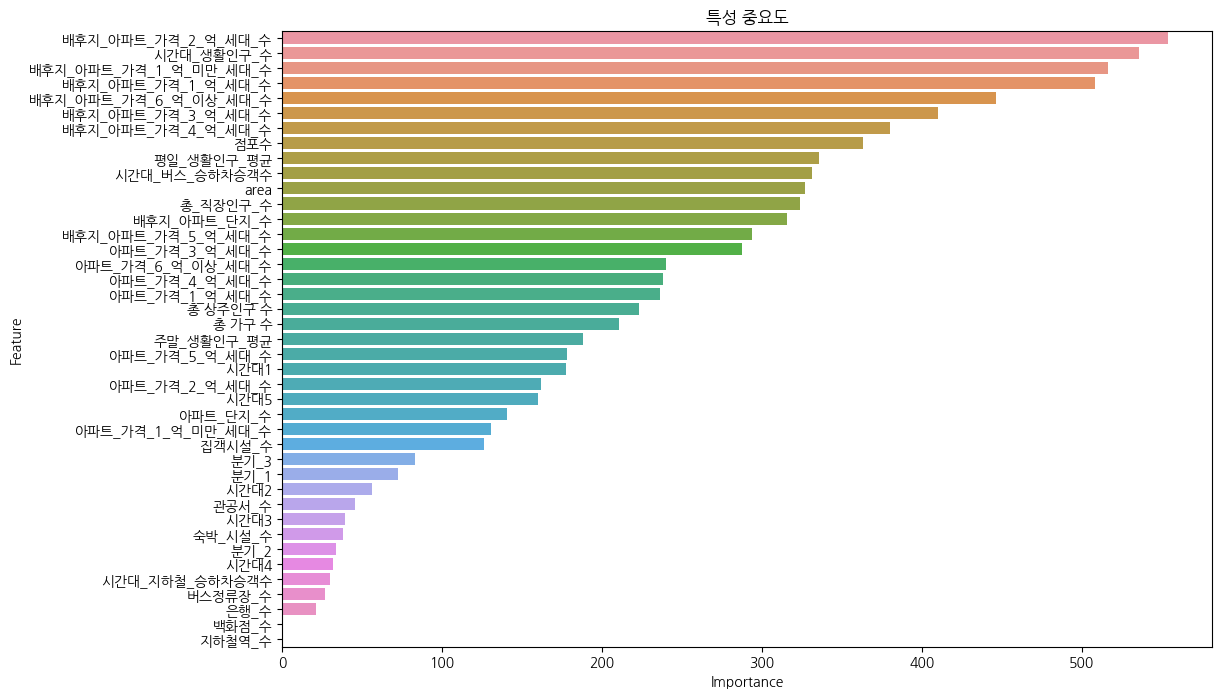

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 59, 'n_estimators': 253, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 41}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 6: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 7: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate'

In [26]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data2[features]
y = data2['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 10
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 145321	training's l2: 2.11183e+10	valid_1's rmse: 155245	valid_1's l2: 2.41011e+10
[2]	training's rmse: 139927	training's l2: 1.95795e+10	valid_1's rmse: 149761	valid_1's l2: 2.24284e+10
[3]	training's rmse: 134932	training's l2: 1.82066e+10	valid_1's rmse: 144544	valid_1's l2: 2.08931e+10
[4]	training's rmse: 130204	training's l2: 1.69531e+10	valid_1's rmse: 139739	valid_1's l2: 1.95269e+10
[5]	training's rmse: 125666	training's l2: 1.57921e+10	valid_1's rmse: 134943	valid_1's l2: 1.82096e+10
[6]	training's rmse: 121365	training's l2: 1.47294e+10	valid_1's rmse: 130848	valid_1's l2: 1.71212e+10
[7]	training's rmse: 117314	training's l2: 1.37626e+10	valid_1's rmse: 126724	valid_1's l2: 1.6059e+10
[8]	training's rmse: 113344	training's l2: 1.28469e+10	valid_1's rmse: 12309

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 150612	training's l2: 2.26841e+10	valid_1's rmse: 116480	valid_1's l2: 1.35675e+10
[2]	training's rmse: 146168	training's l2: 2.13651e+10	valid_1's rmse: 112925	valid_1's l2: 1.27521e+10
[3]	training's rmse: 141783	training's l2: 2.01023e+10	valid_1's rmse: 109988	valid_1's l2: 1.20973e+10
[4]	training's rmse: 137616	training's l2: 1.89382e+10	valid_1's rmse: 107219	valid_1's l2: 1.14959e+10
[5]	training's rmse: 133647	training's l2: 1.78615e+10	valid_1's rmse: 104587	valid_1's l2: 1.09385e+10
[6]	training's rmse: 129888	training's l2: 1.68708e+10	valid_1's rmse: 102134	valid_1's l2: 1.04313e+10
[7]	training's rmse: 126250	training's l2: 1.5939e+10	valid_1's rmse: 99523.1	valid_1's l2: 9.90485e+09
[8]	training's rmse: 122815	training's l2: 1.50835e+10	valid_1's rmse: 9700

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 145323	training's l2: 2.11187e+10	valid_1's rmse: 166899	valid_1's l2: 2.78554e+10
[2]	training's rmse: 141125	training's l2: 1.99163e+10	valid_1's rmse: 162294	valid_1's l2: 2.63392e+10
[3]	training's rmse: 137115	training's l2: 1.88005e+10	valid_1's rmse: 157789	valid_1's l2: 2.48974e+10
[4]	training's rmse: 133271	training's l2: 1.77612e+10	valid_1's rmse: 153850	valid_1's l2: 2.36699e+10
[5]	training's rmse: 129618	training's l2: 1.68009e+10	valid_1's rmse: 150191	valid_1's l2: 2.25575e+10
[6]	training's rmse: 126041	training's l2: 1.58862e+10	valid_1's rmse: 146781	valid_1's l2: 2.15448e+10
[7]	training's rmse: 122720	training's l2: 1.50603e+10	valid_1's rmse: 143456	valid_1's l2: 2.05795e+10
[8]	training's rmse: 119425	training's l2: 1.42623e+10	valid_1's rmse: 1399

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 147330	training's l2: 2.17062e+10	valid_1's rmse: 150215	valid_1's l2: 2.25645e+10
[2]	training's rmse: 143041	training's l2: 2.04607e+10	valid_1's rmse: 146254	valid_1's l2: 2.13902e+10
[3]	training's rmse: 138950	training's l2: 1.93071e+10	valid_1's rmse: 142603	valid_1's l2: 2.03357e+10
[4]	training's rmse: 135054	training's l2: 1.82397e+10	valid_1's rmse: 139039	valid_1's l2: 1.93319e+10
[5]	training's rmse: 131417	training's l2: 1.72705e+10	valid_1's rmse: 135778	valid_1's l2: 1.84357e+10
[6]	training's rmse: 127764	training's l2: 1.63236e+10	valid_1's rmse: 132608	valid_1's l2: 1.7585e+10
[7]	training's rmse: 124213	training's l2: 1.54289e+10	valid_1's rmse: 129478	valid_1's l2: 1.67647e+10
[8]	training's rmse: 121041	training's l2: 1.4651e+10	valid_1's rmse: 126799

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 145868	training's l2: 2.12773e+10	valid_1's rmse: 164322	valid_1's l2: 2.70018e+10
[2]	training's rmse: 141578	training's l2: 2.00442e+10	valid_1's rmse: 159959	valid_1's l2: 2.55869e+10
[3]	training's rmse: 137390	training's l2: 1.8876e+10	valid_1's rmse: 155804	valid_1's l2: 2.4275e+10
[4]	training's rmse: 133405	training's l2: 1.77968e+10	valid_1's rmse: 151849	valid_1's l2: 2.30583e+10
[5]	training's rmse: 129643	training's l2: 1.68073e+10	valid_1's rmse: 148239	valid_1's l2: 2.19747e+10
[6]	training's rmse: 126042	training's l2: 1.58867e+10	valid_1's rmse: 144652	valid_1's l2: 2.09242e+10
[7]	training's rmse: 122625	training's l2: 1.50369e+10	valid_1's rmse: 141256	valid_1's l2: 1.99532e+10
[8]	training's rmse: 119382	training's l2: 1.42521e+10	valid_1's rmse: 138022

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=43, early_stopping_rounds=43 will be ignored. Current value: early_stopping_round=43
[1]	training's rmse: 144925	training's l2: 2.10033e+10	valid_1's rmse: 160740	valid_1's l2: 2.58374e+10
[2]	training's rmse: 139756	training's l2: 1.95318e+10	valid_1's rmse: 155479	valid_1's l2: 2.41736e+10
[3]	training's rmse: 134908	training's l2: 1.82001e+10	valid_1's rmse: 150586	valid_1's l2: 2.26761e+10
[4]	training's rmse: 130120	training's l2: 1.69313e+10	valid_1's rmse: 145544	valid_1's l2: 2.11829e+10
[5]	training's rmse: 125616	training's l2: 1.57795e+10	valid_1's rmse: 141180	valid_1's l2: 1.99317e+10
[6]	training's rmse: 121160	training's l2: 1.46798e+10	valid_1's rmse: 136724	valid_1's l2: 1.86934e+10
[7]	training's rmse: 117178	training's l2: 1.37307e+10	valid_1's rmse: 132894	valid_1's l2: 1.76608e+10
[8]	training's rmse: 113208	training's l2: 1.28159e+10	valid_1's rmse: 1290

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 147176	training's l2: 2.16606e+10	valid_1's rmse: 153527	valid_1's l2: 2.35705e+10
[2]	training's rmse: 143224	training's l2: 2.05131e+10	valid_1's rmse: 149416	valid_1's l2: 2.23253e+10
[3]	training's rmse: 139116	training's l2: 1.93533e+10	valid_1's rmse: 145097	valid_1's l2: 2.10531e+10
[4]	training's rmse: 135220	training's l2: 1.82845e+10	valid_1's rmse: 141049	valid_1's l2: 1.9895e+10
[5]	training's rmse: 131540	training's l2: 1.73027e+10	valid_1's rmse: 137232	valid_1's l2: 1.88325e+10
[6]	training's rmse: 127989	training's l2: 1.63812e+10	valid_1's rmse: 133545	valid_1's l2: 1.78344e+10
[7]	training's rmse: 124637	training's l2: 1.55344e+10	valid_1's rmse: 130095	valid_1's l2: 1.69248e+10
[8]	training's rmse: 121466	training's l2: 1.47541e+10	valid_1's rmse: 12674

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 149038	training's l2: 2.22123e+10	valid_1's rmse: 132759	valid_1's l2: 1.76249e+10
[2]	training's rmse: 144640	training's l2: 2.09207e+10	valid_1's rmse: 129151	valid_1's l2: 1.66799e+10
[3]	training's rmse: 140410	training's l2: 1.9715e+10	valid_1's rmse: 126026	valid_1's l2: 1.58825e+10
[4]	training's rmse: 136390	training's l2: 1.86024e+10	valid_1's rmse: 122700	valid_1's l2: 1.50552e+10
[5]	training's rmse: 132593	training's l2: 1.75808e+10	valid_1's rmse: 120118	valid_1's l2: 1.44283e+10
[6]	training's rmse: 128877	training's l2: 1.66092e+10	valid_1's rmse: 117080	valid_1's l2: 1.37077e+10
[7]	training's rmse: 125422	training's l2: 1.57307e+10	valid_1's rmse: 114651	valid_1's l2: 1.31449e+10
[8]	training's rmse: 122107	training's l2: 1.49101e+10	valid_1's rmse: 11197

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 149195	training's l2: 2.22593e+10	valid_1's rmse: 131266	valid_1's l2: 1.72308e+10
[2]	training's rmse: 144784	training's l2: 2.09625e+10	valid_1's rmse: 127747	valid_1's l2: 1.63193e+10
[3]	training's rmse: 140574	training's l2: 1.97611e+10	valid_1's rmse: 124474	valid_1's l2: 1.54939e+10
[4]	training's rmse: 136550	training's l2: 1.86459e+10	valid_1's rmse: 121176	valid_1's l2: 1.46837e+10
[5]	training's rmse: 132730	training's l2: 1.76172e+10	valid_1's rmse: 118110	valid_1's l2: 1.39499e+10
[6]	training's rmse: 129136	training's l2: 1.66762e+10	valid_1's rmse: 115120	valid_1's l2: 1.32526e+10
[7]	training's rmse: 125610	training's l2: 1.57779e+10	valid_1's rmse: 112177	valid_1's l2: 1.25836e+10
[8]	training's rmse: 122300	training's l2: 1.49572e+10	valid_1's rmse: 1093

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] early_stopping_round is set=44, early_stopping_rounds=44 will be ignored. Current value: early_stopping_round=44
[1]	training's rmse: 148542	training's l2: 2.20646e+10	valid_1's rmse: 136404	valid_1's l2: 1.86061e+10
[2]	training's rmse: 144016	training's l2: 2.07406e+10	valid_1's rmse: 132476	valid_1's l2: 1.755e+10
[3]	training's rmse: 139729	training's l2: 1.95241e+10	valid_1's rmse: 128688	valid_1's l2: 1.65607e+10
[4]	training's rmse: 135657	training's l2: 1.84028e+10	valid_1's rmse: 125125	valid_1's l2: 1.56562e+10
[5]	training's rmse: 131791	training's l2: 1.73689e+10	valid_1's rmse: 121717	valid_1's l2: 1.4815e+10
[6]	training's rmse: 128224	training's l2: 1.64415e+10	valid_1's rmse: 118571	valid_1's l2: 1.40592e+10
[7]	training's rmse: 124842	training's l2: 1.55856e+10	valid_1's rmse: 115671	valid_1's l2: 1.33798e+10
[8]	training's rmse: 121608	training's l2: 1.47884e+10	valid_1's rmse: 112873	

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


평균 RMSE: 48091.2758904627
평균 MAE: 27650.340414972336
                   Feature  Importance
32     배후지_아파트_가격_2_억_세대_수       551.2
21              시간대_생활인구_수       492.5
31     배후지_아파트_가격_1_억_세대_수       487.3
30  배후지_아파트_가격_1_억_미만_세대_수       479.0
33     배후지_아파트_가격_3_억_세대_수       384.1
36  배후지_아파트_가격_6_억_이상_세대_수       377.1
9                      점포수       376.5
34     배후지_아파트_가격_4_억_세대_수       355.2
37           시간대_버스_승하차승객수       337.1
22              평일_생활인구_평균       332.3
8                     area       319.0
12                총_직장인구_수       311.8
29            배후지_아파트_단지_수       285.9
17         아파트_가격_3_억_세대_수       279.6
35     배후지_아파트_가격_5_억_세대_수       270.9
20      아파트_가격_6_억_이상_세대_수       233.9
10                총 상주인구 수       226.2
18         아파트_가격_4_억_세대_수       225.9
15         아파트_가격_1_억_세대_수       197.1
11                  총 가구 수       194.7
0                     시간대1       177.3
19         아파트_가격_5_억_세대_수       175.7
23              주말_생활인구_평균       175.4
4          

C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\Downloads\Project_1\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


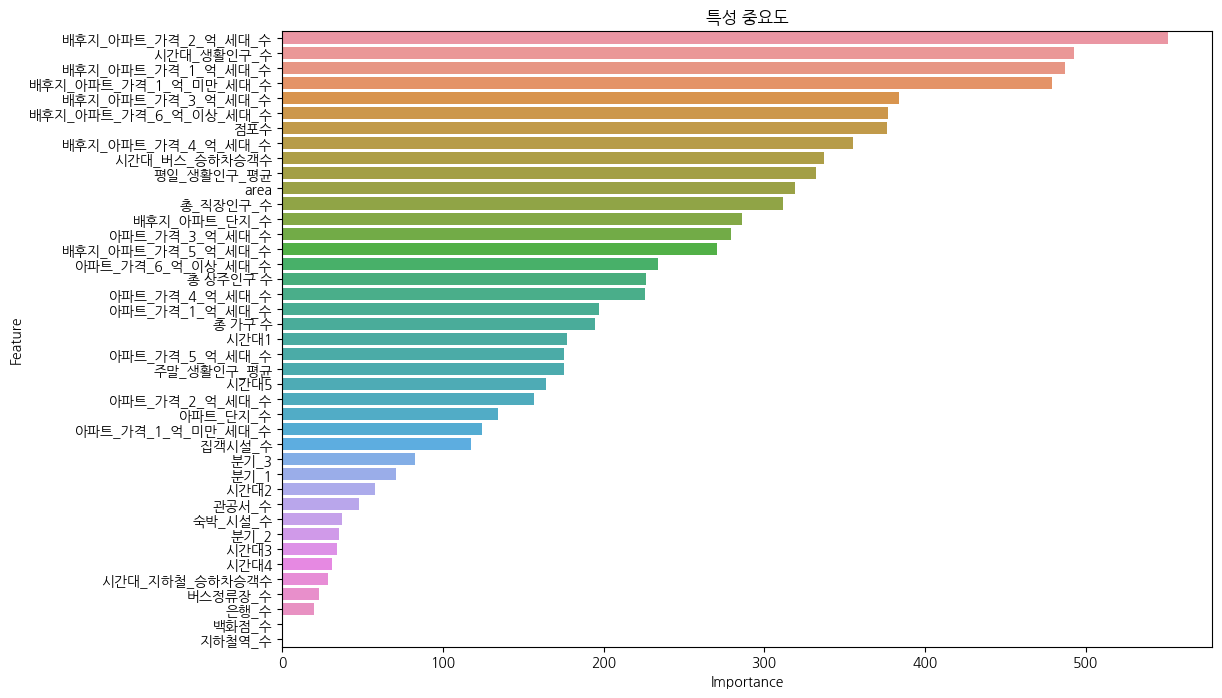

K-fold 교차 검증을 위한 최적 하이퍼파라미터:
Fold 1: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 2: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 3: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 4: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 5: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate': 0.04, 'early_stopping_rounds': 44}
Fold 6: {'objective': 'regression', 'num_leaves': 37, 'n_estimators': 215, 'metric': 'mse', 'learning_rate': 0.05, 'early_stopping_rounds': 43}
Fold 7: {'objective': 'regression', 'num_leaves': 31, 'n_estimators': 286, 'metric': 'mse', 'learning_rate'

In [9]:
#k폴드, 라이트gbm 베이스라인 코드

# 라이브러리 임포트
import lightgbm as lgb
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 데이터 로드(실제 데이터셋 가져오기)
features = ['시간대1', '시간대2', '시간대3', '시간대4', '시간대5', '분기_1', '분기_2', '분기_3', 'area', '점포수',
       '총 상주인구 수', '총 가구 수', '총_직장인구_수', '아파트_단지_수', '아파트_가격_1_억_미만_세대_수',
       '아파트_가격_1_억_세대_수', '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
        '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수', '시간대_생활인구_수', 
        '평일_생활인구_평균', '주말_생활인구_평균', '집객시설_수', '관공서_수', '은행_수',
       '백화점_수', '숙박_시설_수', '배후지_아파트_단지_수',
       '배후지_아파트_가격_1_억_미만_세대_수', '배후지_아파트_가격_1_억_세대_수', '배후지_아파트_가격_2_억_세대_수',
       '배후지_아파트_가격_3_억_세대_수', '배후지_아파트_가격_4_억_세대_수', '배후지_아파트_가격_5_억_세대_수',
       '배후지_아파트_가격_6_억_이상_세대_수', '시간대_버스_승하차승객수', '시간대_지하철_승하차승객수', '버스정류장_수',
       '지하철역_수']

X = data1[features]
y = data1['매출']

# 데이터를 훈련세트와 테스트 세트로 나눔(test_size 설정 필요, 임의로 0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-폴드 교차 검증
num_folds = 10
kf = KFold(n_splits= num_folds, shuffle=True, random_state=42)


# LightGBM 모델 초기화
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# 특성 중요도 리스트 초기화
feature_importance_list = []

# 결과 스코어
rmse_scores = []  # RMSE 스코어를 저장할 리스트
mae_scores = []   # MAE 스코어를 저장할 리스트
best_params_list = []  # 각 fold에서의 최적 파라미터를 저장할 리스트

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 파라미터 범위 설정 (랜덤 서치용)
param_dist = {
    'objective': ['regression'],
    'metric': ['mse'],
    'num_leaves': list(range(7, 64)),              # 7부터 63까지
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05],  #0.01부터 0.05까지
    'n_estimators': list(range(200, 301)),         # 200부터 300까지
    'early_stopping_rounds': list(range(40, 51))  # 40부터 50까지
}


# K-Fold 교차 검증 수행
for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X.iloc[train_index], X.iloc[val_index]
    y_train_kf, y_val_kf = y.iloc[train_index], y.iloc[val_index]


    # 데이터셋
    train_data = lgb.Dataset(X_train_kf, label=y_train_kf)
    val_data = lgb.Dataset(X_val_kf, label=y_val_kf, reference=train_data)


    # 랜덤 서치를 사용한 LightGBM 모델 튜닝
    random_search = RandomizedSearchCV(
        lgb.LGBMRegressor(),
        param_distributions=param_dist,
        n_iter=10,
        scoring='neg_mean_squared_error',
        cv=kf,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    evals = [(X_train_kf, y_train_kf),(X_val_kf, y_val_kf)]
    random_search.fit(X_train_kf, y_train_kf, eval_set = evals, eval_metric='rmse')
    best_params = random_search.best_params_

    bst = lgb.LGBMRegressor(**best_params)

    bst.fit(X_train_kf, y_train_kf,
            eval_set=evals,
            eval_metric='rmse',
            verbose=False)
    

    #Feature importance 계산
    feature_importance = bst.feature_importances_
    feature_importance_list.append(feature_importance)


    # 모델 평가 (RMSE)
    y_pred = bst.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val_kf, y_pred))
    mae = mean_absolute_error(y_val_kf, y_pred)

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    best_params_list.append(best_params)


# 교차 검증 결과 출력
mean_rmse = np.mean(rmse_scores)
mean_mae = np.mean(mae_scores)
print(f'평균 RMSE: {mean_rmse}')
print(f'평균 MAE: {mean_mae}')

# 특성 중요도 평균 계산
average_feature_importance = np.mean(feature_importance_list, axis=0)

# 특성 이름
feature_names = X.columns


# 중요도를 특성 이름과 함께 출력
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': average_feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('특성 중요도')
plt.show()

# K-fold 교차 검증에서 얻은 최적 파라미터 출력
print("K-fold 교차 검증을 위한 최적 하이퍼파라미터:")
for i, params in enumerate(best_params_list):
    print(f'Fold {i + 1}: {params}')